# Modelling Carbon Sequestration Rates

Data sources in data dictionary (.doc in this repo). 

Prior to analysis, all data cleaned using ArcGIS. Pipeline:

1) Load raster and polygon datasets into ArcGIS - project each dataset into WGS1984 projection.

2) Convert all polygon data into raster data for data compatibility.

3) Identify locations at which we have response (carbon sequestration) data - use these points to sample and access all other variables.

4) Export table of sampled variables to csv - all further manipulation done in this Jupyter Notebook.

In [1]:
#loading necessary packages 
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.decomposition
import sklearn.ensemble
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#read in data
predictors = pd.read_csv('pnw_predictors.txt')
carbon = pd.read_csv('pnw_c.txt')
#combine predictor variables and response variable
full_data = pd.merge(predictors, carbon, how='left', left_on=['X','Y'], right_on=['X', 'Y'])
full_data.columns
full_data

,OBJECTID_x,OR_random_Merge_x,X,Y,wc2_0_bio_10m_02,wc2_0_bio_10m_03,wc2_0_bio_10m_04,wc2_0_bio_10m_05,wc2_0_bio_10m_06,wc2_0_bio_10m_07,...,wc2_0_bio_10m_19,Bare_ground_change_1982_2016__1_,Short_vegetation_change_1982_2016,Tree_canopy_change_1982_2016,gt30w140n90,wc2_0_bio_10m_01,OBJECTID_y,OR_random_Merge_y,raster_OR_c,raster_WA_c
0,1,1,-118.512212,44.219979,12.126771,39.348040,692.443047,19.183750,-11.635500,30.819250,...,173.0,0.0,0.0,0.0,1640.0,3.852615,1,1,-0.062215,NaN
1,2,2,-118.589177,44.161284,13.415500,39.205973,750.701697,21.762751,-12.455250,34.218000,...,141.0,0.0,0.0,0.0,1585.0,4.994292,2,2,-0.062215,NaN
2,3,3,-118.606472,43.957034,15.495167,39.717957,830.716540,26.307751,-12.705250,39.013000,...,107.0,0.0,0.0,0.0,1280.0,7.335521,3,3,-0.062215,NaN
3,4,4,-118.597462,44.179292,12.126771,39.348040,692.443047,19.183750,-11.635500,30.819250,...,173.0,0.0,0.0,0.0,1536.0,3.852615,4,4,-0.062215,NaN
4,5,5,-118.548210,44.179804,12.126771,39.348040,692.443047,19.183750,-11.635500,30.819250,...,173.0,0.0,0.0,0.0,1646.0,3.852615,5,5,-0.062215,NaN
5,6,6,-118.671851,43.988574,13.593271,40.015517,741.885985,22.382999,-11.587000,33.969999,...,125.0,0.0,0.0,0.0,1253.0,5.601406,6,6,0.398544,NaN
6,7,7,-118.608878,44.022425,13.415500,39.205973,750.701697,21.762751,-12.455250,34.218000,...,141.0,0.0,0.0,6.0,1572.0,4.994292,7,7,0.398544,NaN
7,8,8,-118.709952,44.057850,12.755062,39.519640,717.653704,21.059500,-11.215750,32.275249,...,138.0,0.0,-13.0,11.0,1543.0,4.998094,8,8,0.398544,NaN
8,9,9,-118.785914,44.075481,12.755062,39.519640,717.653704,21.059500,-11.215750,32.275249,...,138.0,0.0,-17.0,16.0,1862.0,4.998094,9,9,0.398544,NaN
9,10,10,-118.700117,43.972538,13.593271,40.015517,741.885985,22.382999,-11.587000,33.969999,...,125.0,0.0,0.0,0.0,1252.0,5.601406,10,10,0.398544,NaN


In [3]:
or_sequestration = full_data[['raster_OR_c']].dropna()['raster_OR_c']
wa_sequestration = full_data[['raster_WA_c']].dropna()['raster_WA_c']
full_sequestration = list(or_sequestration)+list(wa_sequestration)
full_data['raster_OR_c'].fillna(full_data['raster_WA_c'], inplace=True)
cleaner = full_data.drop(['X', 'Y', 'OBJECTID_x', 'OR_random_Merge_x', 'OBJECTID_y', 'OR_random_Merge_y', 'raster_WA_c'], axis=1)
cleaner = cleaner.dropna()

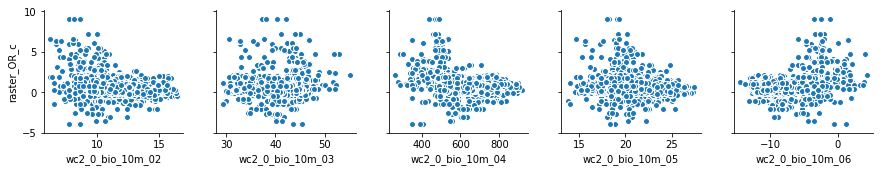

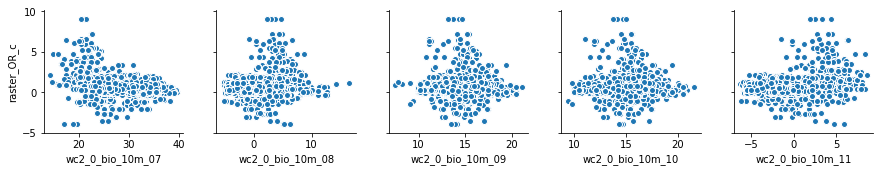

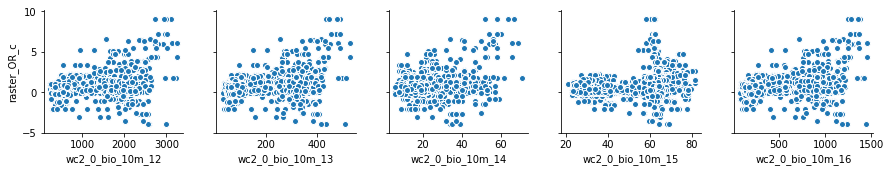

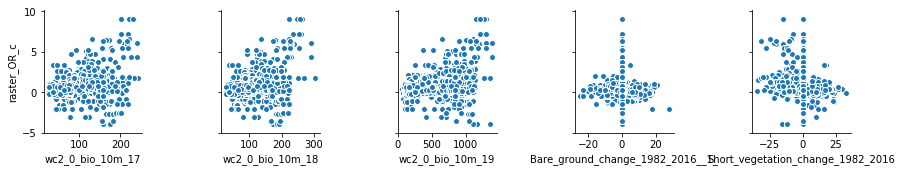

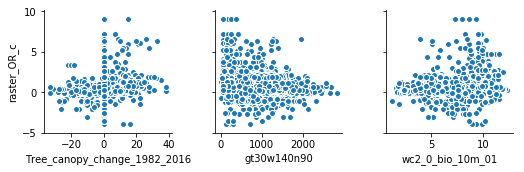

In [4]:
#data exploration
sns.pairplot(data=cleaner, y_vars=['raster_OR_c'], x_vars = full_data.columns[4:9])
sns.pairplot(data=cleaner, y_vars=['raster_OR_c'], x_vars = full_data.columns[9:14])
sns.pairplot(data=cleaner, y_vars=['raster_OR_c'], x_vars = full_data.columns[14:19])
sns.pairplot(data=cleaner, y_vars=['raster_OR_c'], x_vars = full_data.columns[19:24])
sns.pairplot(data=cleaner, y_vars=['raster_OR_c'], x_vars = full_data.columns[24:27])

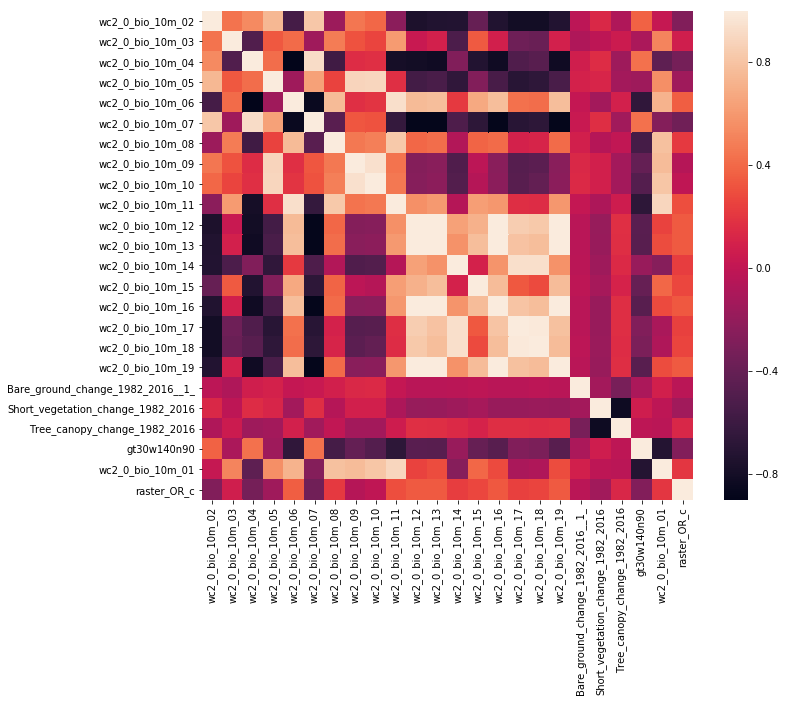

In [5]:
corr = cleaner.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr)

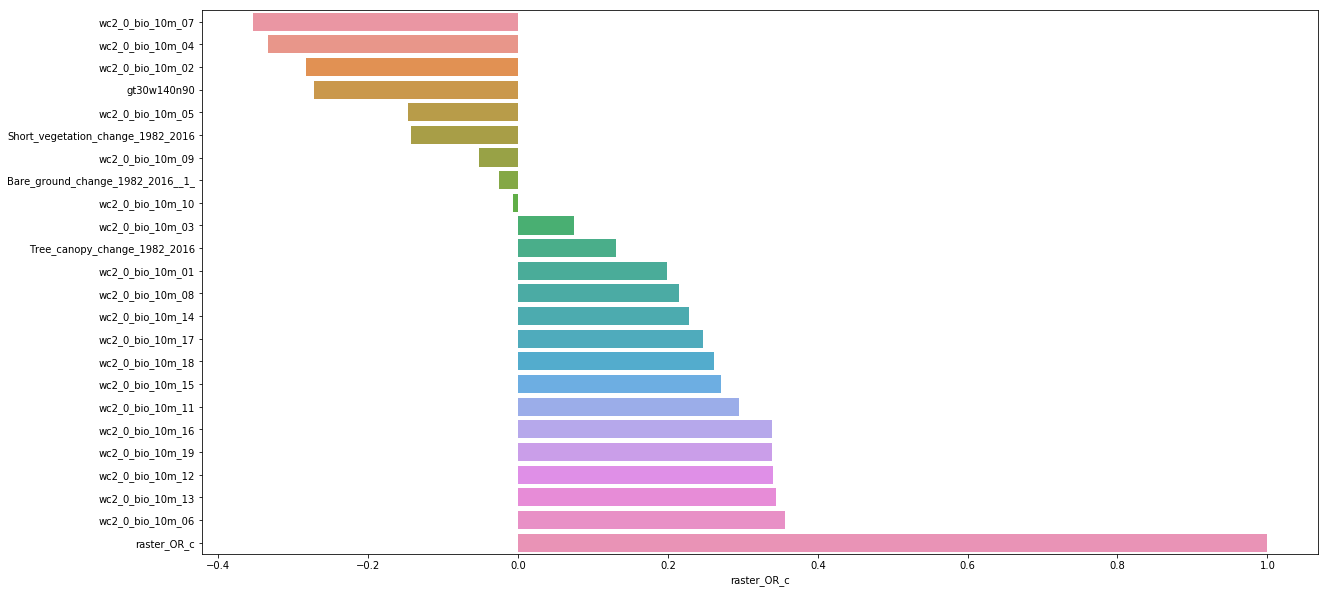

In [10]:
focus = corr[['raster_OR_c']].sort_values('raster_OR_c')
plt.figure(figsize=(20,10))
sns.barplot(x = focus['raster_OR_c'], y = focus.index, orient='h')

In [8]:
from sklearn import preprocessing

In [9]:
X = cleaner.iloc[:, 0:23]
standard_X = pd.DataFrame(preprocessing.scale(X))
# cleaner['raster_OR_c']
standard_X['target'] = cleaner['raster_OR_c']
standard_X.columns = cleaner.columns
standard_X.head()

,wc2_0_bio_10m_02,wc2_0_bio_10m_03,wc2_0_bio_10m_04,wc2_0_bio_10m_05,wc2_0_bio_10m_06,wc2_0_bio_10m_07,wc2_0_bio_10m_08,wc2_0_bio_10m_09,wc2_0_bio_10m_10,wc2_0_bio_10m_11,...,wc2_0_bio_10m_16,wc2_0_bio_10m_17,wc2_0_bio_10m_18,wc2_0_bio_10m_19,Bare_ground_change_1982_2016__1_,Short_vegetation_change_1982_2016,Tree_canopy_change_1982_2016,gt30w140n90,wc2_0_bio_10m_01,raster_OR_c
0,0.402943,-0.052162,0.478296,-0.566094,-1.003294,0.486643,-1.038166,-0.964092,-1.172924,-1.177425,...,-0.859743,-0.575764,-0.714367,-0.847494,-0.011519,0.096445,-0.119862,1.051149,-1.432185,-0.062215
1,0.981048,-0.082440,0.986583,0.447605,-1.218835,1.182900,-0.945342,-0.147397,-0.325213,-1.136788,...,-0.952842,-0.807037,-0.930314,-0.941101,-0.011519,0.096445,-0.119862,0.942904,-0.908150,-0.062215
2,1.913955,0.026676,1.684685,2.234058,-1.284569,2.165188,-0.669905,1.359685,1.239101,-0.805737,...,-1.051418,-1.080358,-1.185523,-1.040558,-0.011519,0.096445,-0.119862,0.342636,0.166486,-0.062215
3,0.402943,-0.052162,0.478296,-0.566094,-1.003294,0.486643,-1.038166,-0.964092,-1.172924,-1.177425,...,-0.859743,-0.575764,-0.714367,-0.847494,-0.011519,0.096445,-0.119862,0.846467,-1.432185,-0.062215
4,0.402943,-0.052162,0.478296,-0.566094,-1.003294,0.486643,-1.038166,-0.964092,-1.172924,-1.177425,...,-0.859743,-0.575764,-0.714367,-0.847494,-0.011519,0.096445,-0.119862,1.062957,-1.432185,-0.062215


In [10]:
#First approach, with standardized data
pca = sklearn.decomposition.PCA(n_components=5)
pca.fit(cleaner.iloc[:,0:23])
small = pca.transform(standard_X.iloc[:,0:23])
train_pca = pd.DataFrame(small)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(train_pca, cleaner.iloc[:,23], test_size=0.2)
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.13429011148023373

In [11]:
#this was a first approach, attempting to use all the data, without any intelligence in picking variables
pca = sklearn.decomposition.PCA(n_components=5)
pca.fit(cleaner.iloc[:,0:23])
small = pca.transform(cleaner.iloc[:,0:23])
train_pca = pd.DataFrame(small)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(train_pca, cleaner.iloc[:,23], test_size=0.2)
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.1410586068185169

So just doing dimensionality reduction of the predictor variables didn't help...

In [12]:
X_train2, X_test2, y_train2, y_test2= sklearn.model_selection.train_test_split(
cleaner.loc[:,['Bare_ground_change_1982_2016__1_','Short_vegetation_change_1982_2016','Tree_canopy_change_1982_2016']], cleaner.iloc[:,23], test_size=0.2)

In [13]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train2, y_train2)
model.score(X_train2, y_train2)

0.01949785982538832

In [14]:
X_train2, X_test2, y_train2, y_test2= sklearn.model_selection.train_test_split(
standard_X.loc[:,['Bare_ground_change_1982_2016__1_','Short_vegetation_change_1982_2016','Tree_canopy_change_1982_2016']], cleaner.iloc[:,23], test_size=0.2)
model = sklearn.linear_model.LinearRegression()
model.fit(X_train2, y_train2)
model.score(X_train2, y_train2)

0.021029858442759623

and this ^ correlation from ground change data suggests the climate data is the part that matters for the small small correlation seen in the PCA above. All the 0 values for ground change data washes out any other relationship, it looks like - it seems reasonable, though, that areas of land that experienced a ground cover change would have a relationship between the magnitude of that change and carbon sequestration rates - eg higher sequestration where canopies increased - because these are non-equilibrium sequestration rates we're seeing!

In [15]:
#one more time - choosing features slightly more intelligently after looking at scatter plots
X_train3, X_test3, y_train3, y_test3= sklearn.model_selection.train_test_split(
cleaner.loc[:,['wc2_0_bio_10m_01',
       'wc2_0_bio_10m_17', 'wc2_0_bio_10m_12', 'wc2_0_bio_10m_11',
       'wc2_0_bio_10m_07', 'wc2_0_bio_10m_06']], cleaner.iloc[:,23], test_size=0.2)
model3 = sklearn.linear_model.LinearRegression()
model3.fit(X_train3, y_train3)
print('model 3 validation r^2: ', model3.score(X_train3, y_train3))
#the following was added after the fact, upon seeing correlation go up with random forest regressor
model3_5 = sklearn.ensemble.RandomForestRegressor(n_estimators=10)
model3_5.fit(X_train3, y_train3)
print('model 3.5 validation r^2: ',model3_5.score(X_train3, y_train3))
print('model 3.5 test r^2: ', model3_5.score(X_test3, y_test3))

model 3 validation r^2:  0.14726898481257478
model 3.5 validation r^2:  0.7912863958378813
model 3.5 test r^2:  0.4842067263431137


No need to standardize data for the random forest model.

well that's a little better, but it's clear other layers are needed. Going to make a new dataset to work with that includes some more variables that could vary on the spatial scale we're forced to work with by virtue of the seq. data not being point data, but being polygon data that covers a larger area.

List of variables for this dataset:

bioclim variables 1,4,6,11,13,16 - ones that seem to have some relationship in the scatter plot exploration, but aren't redundant: Annual Mean Temperature, Temperature Seasonality, Min Temperature of Coldest Month, Mean Temperature of Coldest Quarter, Precipitation of Wettest Month, Precipitation of Wettest Quarter. Note that this somewhat matches up with an exploration of the covariance matrice, with 6, 11, 13, and 16 being within the top 6 most positively correlated variables with the target, and 4 being within the top 2 of the most negatively correlated. 

soil characteristics: cation exchange capacity, pH*10, and soil bulk density, all at 30cm (an arbitrary choice, but deep enough to not be very variable due to topsoil processes but shallow enough for a variety of tree sizes to respond to this)

existing carbon stock - more developed forest should have lower sequestration rates and higher existing carbon stock.

exclude topography (because response variable is reported as a mean over an area with variable topography) and bare ground change/tree canopy change/short vegetation change - a dream layer would be "time since disturbance", which would be created from the 1982-2011 data on tree cover, etc. see further description of this layer in "next steps"



Data processing:

merge oregon and washington soil rasters (ph, CEC, BD) using mosaic to new raster tool

add a "num_points" field to carbon sequestration (merged polygons) attribute table that's just the number 7

use Create Random Points tool - set constraining feature class to carbon sequestration polygons, use num_points field to determine how many will be sampled in each polygon.

use Polygon to Raster tool to turn oregon carbon stock, oregon sequestration, washington carbon stock, and washington sequestration to rasters.

Use mosaic to raster to turn the sequestration rasters into one, and stock rasters into one.

FINALLY use Sample tool to find raster values at all created random points.

Export table as .txt file


In [11]:
updated_data = pd.read_csv('fixedpnwround2.txt').replace(-9999, np.nan).drop('Rowid_', axis=1).dropna()

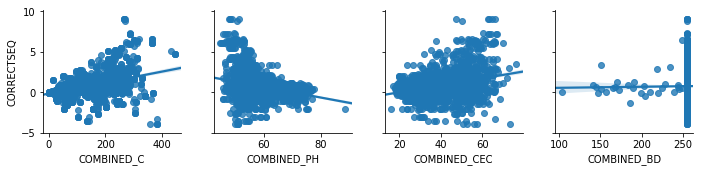

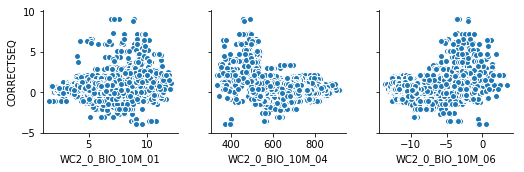

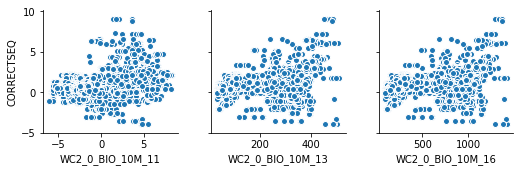

In [12]:
sns.pairplot(data=updated_data, x_vars=['COMBINED_C','COMBINED_PH', 'COMBINED_CEC', 'COMBINED_BD'],
             y_vars=['CORRECTSEQ'], kind='reg')
sns.pairplot(data=updated_data, x_vars=['WC2_0_BIO_10M_01',
       'WC2_0_BIO_10M_04', 'WC2_0_BIO_10M_06'], y_vars=['CORRECTSEQ'])
sns.pairplot(data=updated_data, x_vars=['WC2_0_BIO_10M_11',
       'WC2_0_BIO_10M_13', 'WC2_0_BIO_10M_16'], y_vars=['CORRECTSEQ'])

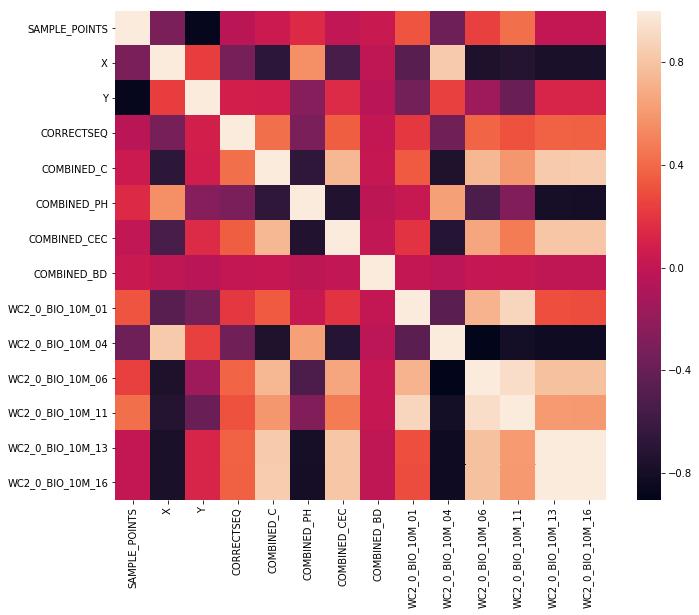

In [13]:
corr = updated_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr)

In [14]:
corr[['CORRECTSEQ']].sort_values('CORRECTSEQ')

,CORRECTSEQ
WC2_0_BIO_10M_04,-0.359209
X,-0.330338
COMBINED_PH,-0.313632
SAMPLE_POINTS,-0.030502
COMBINED_BD,0.006961
Y,0.079369
WC2_0_BIO_10M_01,0.208770
WC2_0_BIO_10M_11,0.313230
COMBINED_CEC,0.354086
WC2_0_BIO_10M_16,0.366330


In [15]:
updated_data

,SAMPLE_POINTS,X,Y,CORRECTSEQ,COMBINED_C,COMBINED_PH,COMBINED_CEC,COMBINED_BD,WC2_0_BIO_10M_01,WC2_0_BIO_10M_04,WC2_0_BIO_10M_06,WC2_0_BIO_10M_11,WC2_0_BIO_10M_13,WC2_0_BIO_10M_16
0,0,911976.617356,5.357005e+06,2.029400,167.813904,58.965643,45.590278,255.000000,7.040217,799.130967,-10.968351,-2.694131,85.337638,240.268649
1,1,901817.075322,5.363050e+06,1.789343,158.315415,54.045296,43.888858,255.000000,6.328214,782.814812,-10.779201,-3.125324,83.965263,236.661452
2,2,918805.202873,5.369724e+06,2.029400,166.737509,62.911784,30.678458,255.000000,7.120946,808.225666,-11.248461,-2.795291,90.993851,258.906722
3,3,925121.402213,5.364111e+06,0.710281,99.616169,62.480930,33.984541,255.000000,7.106221,802.095926,-11.008685,-2.680838,94.153166,268.574089
4,4,906940.305528,5.361813e+06,2.029400,167.813904,58.638708,40.451616,255.000000,6.546063,787.948963,-10.826986,-3.001255,85.298647,240.266599
5,5,923194.379255,5.360839e+06,0.830374,99.259460,60.278140,34.636584,255.000000,7.230453,804.829520,-11.070569,-2.603661,91.762996,261.060821
6,6,908695.025174,5.368566e+06,2.029400,167.813904,57.000000,38.361477,255.000000,6.258049,782.755250,-10.806530,-3.211420,88.396264,250.332797
7,7,932480.046030,5.362512e+06,0.710281,99.259460,60.000000,48.729441,255.000000,6.864768,790.867193,-10.705518,-2.708903,99.388867,284.747798
8,8,915558.044959,5.383906e+06,0.710281,99.259460,58.000000,43.401705,255.000000,6.429720,786.482773,-11.026241,-3.110087,94.124048,268.541018
9,9,905884.243682,5.387936e+06,0.770816,99.259460,55.206737,38.345037,255.000000,5.668242,767.143103,-11.017449,-3.549550,91.886374,262.602256


In [17]:
from sklearn import preprocessing
stand_update = preprocessing.scale(updated_data[[x for x in updated_data.columns if x != 'CORRECTSEQ']])
stand_update = pd.DataFrame(stand_update)
stand_update.columns = [x for x in updated_data.columns if x != 'CORRECTSEQ']
stand_update.index = updated_data.index
stand_update['CORRECTSEQ'] = updated_data['CORRECTSEQ']
stand_update['SAMPLE_POINTS'] = updated_data['SAMPLE_POINTS']
stand_update['X'] = updated_data['X'] #correcting
stand_update['Y'] = updated_data['Y']
stand_update

,SAMPLE_POINTS,X,Y,COMBINED_C,COMBINED_PH,COMBINED_CEC,COMBINED_BD,WC2_0_BIO_10M_01,WC2_0_BIO_10M_04,WC2_0_BIO_10M_06,WC2_0_BIO_10M_11,WC2_0_BIO_10M_13,WC2_0_BIO_10M_16,CORRECTSEQ
0,0,911976.617356,5.357005e+06,0.385880,0.056491,0.714672,0.086505,0.064593,1.372853,-0.778299,-0.705597,-0.668412,-0.673757,2.029400
1,1,901817.075322,5.363050e+06,0.274039,-0.701341,0.562715,0.086505,-0.289219,1.225253,-0.725898,-0.848800,-0.679458,-0.683914,1.789343
2,2,918805.202873,5.369724e+06,0.373206,0.664276,-0.617130,0.086505,0.104710,1.455126,-0.855899,-0.739193,-0.622885,-0.621279,2.029400
3,3,925121.402213,5.364111e+06,-0.417126,0.597915,-0.321858,0.086505,0.097392,1.399675,-0.789473,-0.701182,-0.597455,-0.594059,0.710281
4,4,906940.305528,5.361813e+06,0.385880,0.006136,0.255729,0.086505,-0.180964,1.271697,-0.739136,-0.807596,-0.668726,-0.673763,2.029400
5,5,923194.379255,5.360839e+06,-0.421326,0.258642,-0.263623,0.086505,0.159126,1.424404,-0.806617,-0.675551,-0.616694,-0.615213,0.830374
6,6,908695.025174,5.368566e+06,0.385880,-0.246258,0.069054,0.086505,-0.324086,1.224714,-0.733469,-0.877393,-0.643793,-0.645420,2.029400
7,7,932480.046030,5.362512e+06,-0.421326,0.215802,0.995037,0.086505,-0.022592,1.298097,-0.705485,-0.710503,-0.555313,-0.548519,0.710281
8,8,915558.044959,5.383906e+06,-0.421326,-0.092238,0.519207,0.086505,-0.238778,1.258434,-0.794337,-0.843740,-0.597690,-0.594152,0.710281
9,9,905884.243682,5.387936e+06,-0.421326,-0.522456,0.067586,0.086505,-0.617176,1.083482,-0.791901,-0.989689,-0.615701,-0.610873,0.770816


bulk density doesn't seem to matter that much, and we don't have full data on it, so I'm going to drop it from the model:

In [18]:
X_train4, X_test4, y_train4, y_test4= sklearn.model_selection.train_test_split(
updated_data.loc[:,['COMBINED_C','COMBINED_PH', 'COMBINED_CEC','WC2_0_BIO_10M_01',
       'WC2_0_BIO_10M_04', 'WC2_0_BIO_10M_06', 'WC2_0_BIO_10M_11', 'WC2_0_BIO_10M_13','WC2_0_BIO_10M_16']], updated_data.loc[:,['CORRECTSEQ']], test_size=0.2)
model4 = sklearn.linear_model.RidgeCV()
model4.fit(X_train4, y_train4)
model4.score(X_train4, y_train4)

0.2562784651109201

In [19]:
X_train4, X_test4, y_train4, y_test4= sklearn.model_selection.train_test_split(
stand_update.loc[:,['COMBINED_C','COMBINED_PH', 'COMBINED_CEC','WC2_0_BIO_10M_01',
       'WC2_0_BIO_10M_04', 'WC2_0_BIO_10M_06', 'WC2_0_BIO_10M_11', 'WC2_0_BIO_10M_13','WC2_0_BIO_10M_16']], updated_data.loc[:,['CORRECTSEQ']], test_size=0.2)
model4 = sklearn.linear_model.RidgeCV()
model4.fit(X_train4, y_train4)
model4.score(X_train4, y_train4)

0.23566432978729268

Although this is absolutely nowhere near the predictive power we'd like, it has improved a lot from previously, showing the importance of careful feature selection!


In [20]:
X_train5, X_test5, y_train5, y_test5= sklearn.model_selection.train_test_split(
updated_data.loc[:,['COMBINED_C','COMBINED_PH', 'COMBINED_CEC', 'WC2_0_BIO_10M_01',
       'WC2_0_BIO_10M_04', 'WC2_0_BIO_10M_06', 'WC2_0_BIO_10M_11', 'WC2_0_BIO_10M_13','WC2_0_BIO_10M_16']], updated_data.loc[:,['CORRECTSEQ']], test_size=0.2)
model5 = sklearn.ensemble.RandomForestRegressor(n_estimators=10)
model5.fit(X_train5, y_train5)
print('training r^2: ', model5.score(X_train5, y_train5))
#first time the r^2 is high enough that i actually want to see validation accuracy!
print('validation r^2: ', model5.score(X_test5, y_test5))

training r^2:  0.9359262281455534
validation r^2:  0.79733247804886


/home/austen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [21]:
# Last trials - splitting by geography and creating separate 
region1 = updated_data[updated_data['X']> 700000] #Arbitrary split on x >/<= 700000
region2 = updated_data[updated_data['X'] <= 700000]

In [22]:
X_train5_1, X_test5_1, y_train5_1, y_test5_1= sklearn.model_selection.train_test_split(
region1.loc[:,['COMBINED_C','COMBINED_PH', 'COMBINED_CEC', 'WC2_0_BIO_10M_01',
       'WC2_0_BIO_10M_04', 'WC2_0_BIO_10M_06', 'WC2_0_BIO_10M_11', 'WC2_0_BIO_10M_13','WC2_0_BIO_10M_16']], region1.loc[:,['CORRECTSEQ']], test_size=0.2)
model5_1 = sklearn.ensemble.RandomForestRegressor(n_estimators=10)
model5_1.fit(X_train5_1, y_train5_1)
print('training r^2: ', model5_1.score(X_train5_1, y_train5_1))
#first time the r^2 is high enough that i actually want to see validation accuracy!
print('validation r^2: ', model5_1.score(X_test5_1, y_test5_1))

training r^2:  0.9285732295390262
validation r^2:  0.7004449380666331


/home/austen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [23]:
X_train5_2, X_test5_2, y_train5_2, y_test5_2= sklearn.model_selection.train_test_split(
region2.loc[:,['COMBINED_C','COMBINED_PH', 'COMBINED_CEC', 'WC2_0_BIO_10M_01',
       'WC2_0_BIO_10M_04', 'WC2_0_BIO_10M_06', 'WC2_0_BIO_10M_11', 'WC2_0_BIO_10M_13','WC2_0_BIO_10M_16']], region2.loc[:,['CORRECTSEQ']], test_size=0.2)
model5_2 = sklearn.ensemble.RandomForestRegressor(n_estimators=10)
model5_2.fit(X_train5_2, y_train5_2)
print('training r^2: ', model5_2.score(X_train5_2, y_train5_2))
#first time the r^2 is high enough that i actually want to see validation accuracy!
print('validation r^2: ', model5_2.score(X_test5_2, y_test5_2))


training r^2:  0.9451254182624378
validation r^2:  0.7627717617142703


/home/austen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [24]:
#unfortunately i can't get soil data for canada so i wanna see how bad it is if i get rid of that
X_train5_5, X_test5_5, y_train5_5, y_test5_5 = sklearn.model_selection.train_test_split(
updated_data.loc[:,['COMBINED_C','WC2_0_BIO_10M_01',
       'WC2_0_BIO_10M_04', 'WC2_0_BIO_10M_06', 'WC2_0_BIO_10M_11', 'WC2_0_BIO_10M_13','WC2_0_BIO_10M_16']], updated_data.loc[:,['CORRECTSEQ']], test_size=0.2)
model5 = sklearn.ensemble.RandomForestRegressor(n_estimators=10)
model5.fit(X_train5_5, y_train5_5)
print('training r^2: ', model5.score(X_train5_5, y_train5_5))
print('validation r^2: ', model5.score(X_test5_5, y_test5_5))
#WHOOPS it's comparable - poster already submitted though

training r^2:  0.953929691433041
validation r^2:  0.7574716616427919


/home/austen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Not much difference between the two models (split of around 1000 data points in region1, 1800 in region 2). This could be because the data here is quite similar, even across the two datasets - the type of region does not differ extremely across the washington/oregon region, and thus the models are extremely similar.

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': range(100, 201, 5),
}

rf = sklearn.ensemble.RandomForestRegressor(random_state = 10)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [55]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    grid_search.fit(X_train5, y_train5) # Do grid search on the original test/train split with
#updated_data

Fitting 3 folds for each of 945 candidates, totalling 2835 fits
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.0s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105, total=   2.3s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=105 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.6s
[CV] bootstrap=True, max_de

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.4s


[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   4.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   5.0s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   4.5s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=165 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=160, total=   4.9s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=165 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=160, total=   5.1s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=115, total=   2.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=120 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=115, total=   2.9s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   2.6s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   2.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   2.8s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=180, total=   4.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   4.6s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   4.4s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   4.5s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=195 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=190, total=   3.9s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=140, total=   3.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=150 


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min


[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=145, total=   3.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=145, total=   3.6s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   3.3s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   2.8s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   4.1s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=105, total=   2.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=115 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   2.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=115 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   2.4s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=115 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   2.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=115, total=   2.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=175, total=   3.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=180 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=175, total=   4.4s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=180 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=175, total=   4.0s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   4.5s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   4.3s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=135, total=   4.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=140 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=135, total=   4.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   5.9s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   4.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   5.5s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   5.3s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=105 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   4.6s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=105 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   2.4s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=105 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   2.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   2.4s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=165, total=   4.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=170 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=165, total=   5.0s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=170 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=165, total=   5.4s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=175 


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.0min


[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   4.6s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   5.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   3.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=175, total=   4.6s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=175, total=   4.8s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=130, total=   3.1s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=135 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=130, total=   3.6s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   3.3s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   3.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   2.8s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=195, total=   4.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   4.5s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   2.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   2.1s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   4.9s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=160, total=   4.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=165 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=160, total=   3.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=165 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=160, total=   3.8s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   3.8s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   3.0s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=120, total=   2.3s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=125 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=120, total=   2.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=130 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   2.3s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=130 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   2.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=130 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   2.0s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=185, total=   3.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=195 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=190, total=   3.1s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=195 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=190, total=   3.1s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=195 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=190, total=   2.6s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   3.4s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=3, min_

[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=155 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150, total=   2.7s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=155 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150, total=   2.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   2.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   2.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=155,

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=110, total=   1.8s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=120 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=115, total=   1.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=120 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=115, total=   1.6s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=120 


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.7min


[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   1.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=115, total=   1.9s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   1.7s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   1.9s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=130 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=125, total=   1.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_e

[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   4.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   4.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=195 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=190, total=   3.9s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=195 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=190, total=   3.7s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=195 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=195,

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=145, total=   2.7s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   2.9s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   3.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=155, total=   2.8s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=160 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   3.3s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_e

[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=115 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   2.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=115 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   2.6s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=115, total=   2.0s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=115, total=   2.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=115,

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   3.0s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=175, total=   3.3s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   2.7s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   3.3s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=190 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=185, total=   3.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_e

[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   2.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   2.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=145, total=   2.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=145, total=   2.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=150,

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   2.3s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   2.3s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   2.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=110, total=   1.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=115 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   2.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_e

[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   5.6s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   5.7s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=175, total=   4.8s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=175, total=   4.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=175,

[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=135 
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   2.8s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   2.6s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   2.6s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=145 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=140, total=   2.7s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=145 


[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 14.2min


[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   4.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   4.0s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   1.9s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   2.9s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   1.8s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_e

[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=165 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=160, total=   2.3s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   2.9s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   3.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   2.6s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=175 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=170,

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   2.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=130 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   1.9s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=130 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=130, total=   1.9s
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   2.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=135 
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=135 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=130, total=   2.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_e

[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=195 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=190, total=   3.3s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   2.6s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   3.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   3.3s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=200,

[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   4.5s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   4.2s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   4.8s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=165 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=160, total=   4.1s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=165 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=160, total=   3.9s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_e

[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=120 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=115, total=   3.3s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   3.3s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   3.4s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   2.8s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=130 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=125,

[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   4.8s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   4.1s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   4.8s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=195 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=190, total=   3.6s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=195 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=190, total=   4.6s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=3, n_e

[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=145, total=   3.4s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   4.5s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   3.8s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   3.4s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=160 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=155,

[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   2.3s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=115 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   2.5s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=115 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   2.0s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=115, total=   2.5s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=115, total=   2.5s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_e

[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=180 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   3.1s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=175, total=   3.5s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   3.7s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   3.3s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=190 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=185,

[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   3.8s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   3.6s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   4.1s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=145, total=   3.9s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=145, total=   3.7s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=3, n_e

[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=105 


[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 20.5min


[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   2.0s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   2.1s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   2.6s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   2.7s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=115 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=110, total=   2.2s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_e

[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   3.7s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   3.5s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=175, total=   3.4s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=175, total=   4.0s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=180,

[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=130, total=   3.1s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   2.9s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   2.8s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   3.1s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=145 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=140, total=   2.6s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_e

[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.5s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.2s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=100,

[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=160, total=   3.0s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   3.2s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   3.1s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   3.8s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=175 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=170, total=   3.7s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=3, n_e

[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=130 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   1.9s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=130 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   1.6s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=135 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=130, total=   1.7s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=135 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=130, total=   2.5s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=135 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=130,

[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=195 
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   4.8s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   4.2s
[CV] bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   4.2s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   5.0s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   3.3s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   4.1s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=165 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=160, total=   4.4s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=165 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=160, total=   3.7s
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=160, total=   4.0s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_e

[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=115, total=   2.9s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   3.3s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   2.9s
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   2.8s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=130 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=125, total=   3.1s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_e

[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   4.5s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   5.1s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=195 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=190, total=   5.2s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=195 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=190, total=   6.4s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=195 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=190,

[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=145, total=   2.4s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   2.9s
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   3.0s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   2.8s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=160 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=155, total=   3.0s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=4, n_e

[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=115 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   3.0s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=115 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   2.8s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=115, total=   3.2s
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=115, total=   2.6s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=115,

[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=175, total=   4.2s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   4.1s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   4.0s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   4.2s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=190 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=185, total=   4.2s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_e

[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 27.7min


[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   2.4s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   2.6s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   3.0s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=145, total=   3.2s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=145, total=   2.3s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_e

[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=105 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   2.0s
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   2.0s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   1.8s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   1.9s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=115 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=110,

[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   3.4s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   3.3s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   3.6s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=175, total=   3.5s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=175, total=   3.6s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=4, n_e

[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=135 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=130, total=   2.6s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   3.2s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   3.0s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   3.3s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=145 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=140,

[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   5.4s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   5.4s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   2.8s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   4.9s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   2.2s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_e

[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=165 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=160, total=   5.3s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   4.7s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   3.4s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   4.2s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=175 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=170,

[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   2.4s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=130 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   2.9s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=130 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   2.6s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=135 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=130, total=   2.5s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=135 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=130, total=   2.6s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_e

[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=195 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=190, total=   4.5s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   4.9s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   4.0s
[CV] bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   3.3s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=200,

[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=150, total=   3.4s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   3.0s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   2.7s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=165 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=160, total=   2.8s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=165 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=160, total=   3.2s
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_

[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=120 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=115, total=   2.4s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   2.7s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   2.2s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=125 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=120, total=   2.2s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=130 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=125,

[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=180, total=   3.9s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   4.9s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   4.7s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=195 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=190, total=   5.6s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=195 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=190, total=   5.2s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=3, n_e

[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=4, n_estimators=145, total=   3.1s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   2.7s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   3.2s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=4, n_estimators=155, total=   2.7s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=4, n_estimators=160 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=4, n_estimators=150,

[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   3.2s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=115 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   2.8s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=115 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   2.9s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=115, total=   2.9s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=115, total=   3.3s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_e

[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=180 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=175, total=   3.5s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   4.0s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   3.2s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   3.6s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=190 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=185,

[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   3.0s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   2.5s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   2.9s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=3, n_estimators=145, total=   2.7s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=3, n_estimators=145, total=   3.0s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=3, n_e

[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=105 


[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 36.5min


[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   2.2s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   2.0s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   2.0s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   2.2s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=115 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=110, total=   2.1s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_e

[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   3.7s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   4.0s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=175, total=   3.2s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=175, total=   3.5s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=175,

[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=130, total=   2.3s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   2.7s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   2.4s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   3.1s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=145 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=140, total=   2.4s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=2, n_e

[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.1s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   1.5s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   2.4s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   4.4s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=100,

[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=160, total=   4.2s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   5.2s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   4.6s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   4.6s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=175 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_estimators=170, total=   4.6s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=3, n_e

[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=130 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   2.9s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=130 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   2.8s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=135 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=130, total=   2.8s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=135 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=130, total=   2.9s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=135 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=130,

[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=190, total=   4.9s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   5.6s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   5.2s
[CV] bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   4.9s
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   5.0s
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   4.2s
[CV]  bootstrap=True, max_depth=50, min_samples_leaf=3, min_samp

[Parallel(n_jobs=-1)]: Done 2835 out of 2835 | elapsed: 40.1min finished


In [56]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 195}

/home/austen/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


bootstrap 1 [True]
max_depth 5 [None, 10, 20, 30, 50]
min_samples_leaf 3 [1, 2, 3]
min_samples_split 3 [2, 3, 4]
n_estimators 21 range(100, 201, 5)


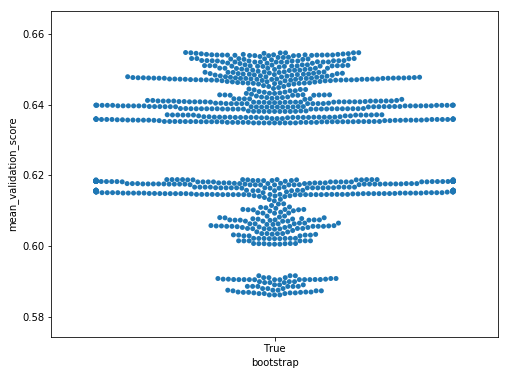

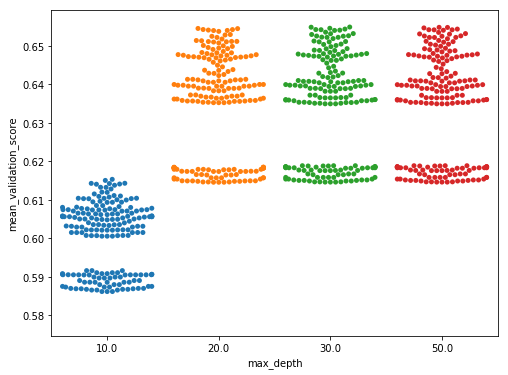

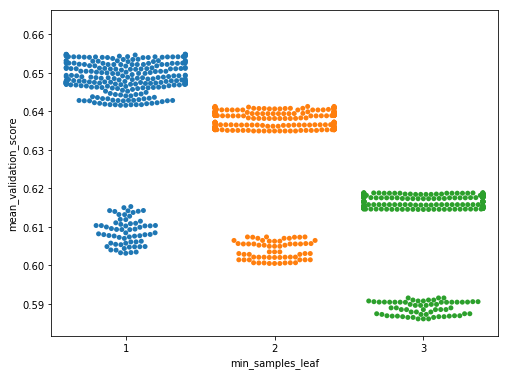

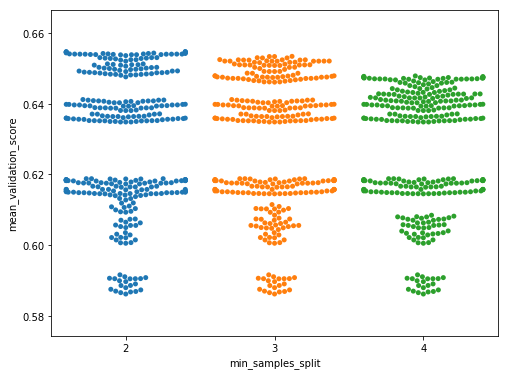

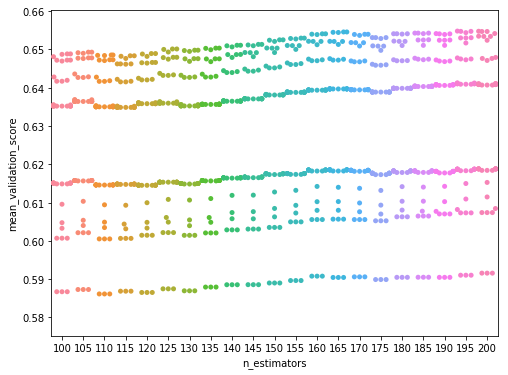

In [61]:
score = pd.DataFrame(grid_search.grid_scores_)
l = ['mean_validation_score'] + list(param_grid.keys())
for i in param_grid.keys():
    print(i, len(param_grid[i]), param_grid[i])
    score[i] = score.parameters.apply(lambda x: x[i])
for i in list(param_grid.keys()):
    plt.figure(figsize=(8, 6))
    sns.swarmplot(data = score[l], x = i, y = 'mean_validation_score')
    #plt.savefig('170705_sgd_optimisation//'+i+'.jpg', dpi = 100)
    plt.show()


In [62]:
base_model = sklearn.ensemble.RandomForestRegressor(n_estimators =10, random_state = 10)
base_model.fit(X_train5, y_train5)
base_accuracy = base_model.score(X_test5, y_test5)
grid_accuracy = grid_search.best_estimator_.score(X_test5, y_test5)

/home/austen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [63]:
print(base_accuracy, grid_accuracy)

0.7678313744867654 0.8225141708338511


In [64]:
grid_search.best_estimator_.score(X_train5, y_train5)

0.9603919440582889

We tune the hyperparameters of the random forest regressor though cross-validated grid search. The final model is 1% better than the base model, although this minimal improvement is primarily due to a scarcity of data. 

In [98]:
X_train7, X_test7, y_train7, y_test7 = sklearn.model_selection.train_test_split(
updated_data.loc[:,['COMBINED_C','COMBINED_PH', 'COMBINED_CEC','WC2_0_BIO_10M_01',
       'WC2_0_BIO_10M_04', 'WC2_0_BIO_10M_06', 'WC2_0_BIO_10M_11', 'WC2_0_BIO_10M_13','WC2_0_BIO_10M_16']], updated_data.loc[:,['CORRECTSEQ']], test_size=0.2)
model7 = sklearn.ensemble.ExtraTreesRegressor(n_estimators=10)
model7.fit(X_train7, y_train7)
print('training r^2: ', model7.score(X_train7, y_train7))
print('validation r^2: ', model7.score(X_test7, y_test7))

training r^2:  0.9999999999596246
validation r^2:  0.7673215384875668


/home/austen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [99]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2', None],
    'n_estimators': range(10, 201, 5),
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
}

rf = sklearn.ensemble.ExtraTreesRegressor(random_state = 10)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [100]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    grid_search.fit(X_train7, y_train7) # Do grid search on the original test/train split with
#updated_data

Fitting 3 folds for each of 1404 candidates, totalling 4212 fits
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_es

[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   1.1s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=85, total=   1.1s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=85, total=   1.2s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=85, total=   1.1s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95 


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   10.4s


[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90, total=   1.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90, total=   1.2s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90, total=   1.4s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95, total=   1.4s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95, total=   1.2s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95, total=   1.3s
[CV] 

[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=165, total=   1.6s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=165, total=   1.6s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=175 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170, total=   2.1s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=175 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170, total=   1.6s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=175 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170, total=   2.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180 
[CV]  max_fe

[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=45, total=   0.9s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=55 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50, total=   1.1s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=55 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50, total=   0.6s
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50, total=   1.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=55 
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=60 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=55, total=   0.8s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=60 
[CV]  max_features=auto

[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed:   54.5s


[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=95, total=   1.2s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=105 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100, total=   1.3s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=105 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100, total=   1.2s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=105 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100, total=   1.3s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=110 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=105, total=   1.3s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=110 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=105, total=   0.9

[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=180 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=170, total=   1.9s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=180 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=175, total=   2.1s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=180 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=180, total=   1.4s
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=175, total=   1.6s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=185 
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=185 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=180, total=   1.7s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=185 
[CV]  max_fe

[CV] max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=60 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=55, total=   0.6s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=60 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=55, total=   0.5s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=65 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=60, total=   0.5s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=65 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=60, total=   0.4s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=65 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=65, total=   0.5s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  max_features=auto

[CV] max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=135 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=130, total=   2.1s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=140 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=135, total=   2.3s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=140 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=135, total=   2.4s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=140 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=135, total=   2.3s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=145 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=140, total=   2.2s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=145 
[CV]  max_fe

[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15, total=   0.2s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15, total=   0.2s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   2.5s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.2s
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.2s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=25 
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=25 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.3s
[CV] ma

[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:  2.0min


[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45, total=   0.3s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45, total=   0.4s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=45, total=   0.5s
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=55 
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=55 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.5s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=55 
[CV] max

[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120, total=   1.1s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=125 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120, total=   1.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=125, total=   1.3s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=125, total=   1.3s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=125, total=   1.3s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=135 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130, total=   1.

[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=195, total=   2.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.2s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=15 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=15, total=   0.1s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=15 
[CV]  max_features=au

[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=85 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=80, total=   0.6s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=85 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=80, total=   0.6s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=85 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=85, total=   0.5s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=90 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=80, total=   0.7s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=90 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=85, total=   0.9s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=90 
[CV]  max_features=auto

[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=150, total=   1.4s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=160 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=155, total=   1.3s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=160 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=155, total=   1.7s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=165 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=160, total=   1.5s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=165 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=160, total=   1.5s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=165 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=160, total=   1.

[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=35, total=   0.3s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=35, total=   0.3s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=45 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=40, total=   0.3s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=45 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=40, total=   0.3s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=45 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=40, total=   0.4s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_features=auto

[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115, total=   0.8s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=120 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115, total=   1.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=120 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=110, total=   1.2s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=120 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115, total=   0.9s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=125 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=120, total=   0.8s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=125 
[CV]  max_fe

[Parallel(n_jobs=-1)]: Done 655 tasks      | elapsed:  3.2min


[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=125, total=   1.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=125, total=   1.1s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=135 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130, total=   1.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=135 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130, total=   0.9s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=135 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=135, total=   1.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=140 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130, total=   1.

[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=15 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=15, total=   0.1s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=15 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=15, total=   0.1s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=15 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=15, total=   0.1s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   1.7s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  max_features=aut

[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=90 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=85, total=   0.6s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=90 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=85, total=   0.6s
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=85, total=   0.6s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=90 
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=90, total=   0.8s
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=90, total=   0.7s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95 
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95 
[CV]  max_features=auto

[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=160, total=   1.9s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=165 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=160, total=   1.6s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=165 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=165, total=   1.5s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=170 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=160, total=   2.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=170 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=165, total=   1.8s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=170 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=165, total=   1.

[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=45 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=40, total=   0.5s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=45 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=40, total=   0.6s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=45, total=   0.7s
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=45, total=   0.5s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=45, total=   0.5s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=55 
[CV]  max_features=auto

[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=120 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=115, total=   1.3s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=125 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=120, total=   1.4s
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=120, total=   1.1s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=125 
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=125 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=120, total=   1.1s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=130 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=125, total=   1.2s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=130 
[CV]  max_fe

[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=190, total=   2.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=195, total=   1.9s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=195, total=   1.8s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=195, total=   1.9s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[

[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=75, total=   0.7s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=80 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=75, total=   0.6s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=80 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=75, total=   0.9s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=85 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=80, total=   0.7s
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=80, total=   1.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=85 
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=85 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=80, total=   1.0s
[CV] max

[Parallel(n_jobs=-1)]: Done 1020 tasks      | elapsed:  5.0min


[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=150, total=   1.4s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=155 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=150, total=   1.5s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=155 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=150, total=   1.5s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=160 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=155, total=   1.4s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=160 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=155, total=   1.3s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=160 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=160, total=   1.

[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=35 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   2.3s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=35 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.4s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=35, total=   0.4s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=35, total=   0.4s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=35, total=   0.5s
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40, total=   0.4s
[CV] ma

[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=110 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=105, total=   1.1s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=115 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=110, total=   1.1s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=115 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=110, total=   1.2s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=115 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=110, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=115, total=   1.1s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120 
[CV]  max_fe

[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=180, total=   1.4s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=190 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=185, total=   1.8s
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=185, total=   1.7s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=190 
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=190 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=185, total=   1.7s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=195 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=190, total=   1.8s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=195 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=190, total=   1.

[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=65, total=   0.7s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=65, total=   0.8s
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=65, total=   0.7s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75, total=   0.6s
[CV] max

[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=140, total=   1.4s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=145 
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=145 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=140, total=   1.7s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=145, total=   1.5s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=145, total=   1.6s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=145, total=   1.8s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=155 
[CV]  max_fe

[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=25 
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=25 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=25, total=   0.3s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=30 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=25, total=   0.2s
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=25, total=   0.3s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=30 
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=30 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=35 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=30, total=   0.3s
[CV]  max_features=sqrt

[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.6s
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=95, total=   1.0s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=105 
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=105 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=105 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=110 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=105, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=110 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=105, total=   1.2

[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=180 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=175, total=   1.3s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=180 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=175, total=   1.5s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=180 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=175, total=   1.2s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=185 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=180, total=   1.5s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=185 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=180, total=   1.2s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=185 
[CV]  max_fe

[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=55, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=55, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=65 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60, total=   0.6s
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=65 
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=65 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60, total=   0.7s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  max_features=sqrt

[Parallel(n_jobs=-1)]: Done 1465 tasks      | elapsed:  7.0min


[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=110, total=   0.7s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=115, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=115, total=   0.7s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=115, total=   0.7s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120, total=   0.7s
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=120, total=   1.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12

[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=195 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=190, total=   2.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=195 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=190, total=   1.7s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=195 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=190, total=   1.5s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=195, total=   1.4s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=195, total=   1.4s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_fe

[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=75 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=75 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=80 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=75, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=80 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=75, total=   0.5s
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=75, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=85 
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=80 
[CV]  max_features=sqrt

[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=145, total=   1.1s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=145, total=   1.1s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=155 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150, total=   1.2s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=155 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150, total=   1.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=155 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=155, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=160 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=155, total=   1.

[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, total=   0.2s
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=35 
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=35 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=35 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=35, total=   0.2s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  max_features=sqrt

[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   0.7s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=110 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=105, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=115 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=110, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=115 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=110, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=115 
[CV]  max_fe

[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=180, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=185 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=180, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=185 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=180, total=   0.7s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=190 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=185, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=190 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=185, total=   0.7s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=190 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=185, total=   0.

[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=60, total=   0.2s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=65 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=60, total=   0.4s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=65, total=   0.3s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=65, total=   0.3s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=65, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=75 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70, total=   0.4s
[CV] max

[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=140 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=140, total=   0.7s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=145 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=135, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=145 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=140, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=145 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=140, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=145, total=   0.7s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150 
[CV]  max_fe

[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   1.4s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.2s
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25 
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, total=   0.2s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, total=   0.1s
[CV] ma

[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=95, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=95, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=95, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.6s
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.4s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=105 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.5s


[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=175 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=170, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=175 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=170, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=180 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=175, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=180 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=175, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=180 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=180, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=185 
[CV]  max_fe

[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:  8.9min


[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=25 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   1.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=25 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=25 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=25, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=25, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=25, total=   0.1s
[CV] ma

[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=95, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=95, total=   0.4s
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=105 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=95, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=105 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=105 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=105, total=   0.5s


[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=175 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=170, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=175 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=170, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=180 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=175, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=180 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=175, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=180 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=175, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=185 
[CV]  max_fe

[CV] max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=55 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=60 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=55, total=   0.2s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=60 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=55, total=   0.2s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=60 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=55, total=   0.4s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=65 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=60, total=   0.3s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=65 
[CV]  max_features=log2

[CV] max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=135 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   0.7s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=135 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   0.8s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=135 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   0.6s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=140 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   0.8s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=140 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   0.7s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=140 
[CV]  max_fe

[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=15 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   1.5s
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=15, total=   0.1s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=15 
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=15, total=   0.1s
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=15, total=   0.1s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] ma

[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=85, total=   0.8s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=90 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=85, total=   0.5s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=95 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=90, total=   0.6s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=95 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=90, total=   0.7s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=95 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=90, total=   0.8s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=95, total=   0.6s
[CV] ma

[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=165 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=160, total=   1.0s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=170 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=165, total=   0.7s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=170 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=165, total=   0.7s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=170 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=165, total=   0.9s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=175 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=170, total=   0.8s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=175 
[CV]  max_fe

[CV] max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=45, total=   0.5s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=45, total=   0.4s
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=45, total=   0.5s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=55 
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=55 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=55 
[CV]  max_features=log2

[CV] max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=125 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=120, total=   0.8s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=125 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=120, total=   0.7s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=130 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=125, total=   0.7s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=130 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=125, total=   0.8s
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=125, total=   0.6s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=130 
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=135 
[CV]  max_fe

[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=195, total=   0.8s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=195, total=   0.8s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.8s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=15 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV]

[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80 
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=85 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.3s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=85 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.4s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=85 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=85, total=   0.4s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=85, total=   0.3s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.4s
[CV] max_features=log2,

[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=160 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=155, total=   0.7s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=160 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=155, total=   0.8s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=160 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=160, total=   0.7s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=165 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=155, total=   0.7s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=165 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=160, total=   0.6s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=165 
[CV]  max_fe

[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, total=   0.2s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=35, total=   0.2s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=35, total=   0.2s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=45 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=40, total=   0.2s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=45 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=40, total=   0.1s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=45 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=40, total=   0.2s
[CV] max

[Parallel(n_jobs=-1)]: Done 2599 tasks      | elapsed: 10.5min


[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=60 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=55, total=   0.2s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=60 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=55, total=   0.3s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=65 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=60, total=   0.3s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=65 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=60, total=   0.2s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=65 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=65, total=   0.2s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  max_features=log2

[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=135 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=130, total=   0.5s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=140 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=135, total=   0.5s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=140 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=135, total=   0.9s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=140 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=135, total=   0.8s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   1.2s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  max_fe

[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=15, total=   0.1s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.1s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=15, total=   0.1s
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.2s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=25 
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=25 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] m

[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=95 
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=95 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=90, total=   0.5s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=95 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=95, total=   0.4s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=90, total=   0.4s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=95, total=   0.4s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=95, total=   0.4s
[CV] max_features=lo

[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=170 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=165, total=   1.1s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=170 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   0.8s
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=165, total=   1.0s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   1.3s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   0.7s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  max_fe

[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=45, total=   0.3s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=55 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=55 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=55, total=   0.2s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=55 
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=60 
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=60 
[CV]  max_features=log2

[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=130 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=125, total=   0.6s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=130 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=125, total=   0.6s
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=125, total=   0.9s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=130 
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=135 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=130, total=   0.6s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=135 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=130, total=   0.6s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=135 
[CV]  max_fe

[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   1.5s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=15, total=   0.1s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=15, total=   0.2s
[CV] ma

[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=80, total=   0.5s
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=80, total=   0.3s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=85 
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=85, total=   0.5s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=85, total=   0.3s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=85, total=   0.4s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=95 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90, total=   0.5s
[CV] max

[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=160 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=155, total=   0.9s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=165 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=160, total=   0.8s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=165 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=160, total=   1.1s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=165 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=160, total=   1.1s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=165, total=   1.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=170 
[CV]  max_fe

[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=45 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=40, total=   0.3s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=45 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=40, total=   0.3s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=45 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=40, total=   0.3s
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=45, total=   0.4s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=45, total=   0.4s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_features=log2

[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=120 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=115, total=   0.6s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=120 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=115, total=   0.5s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=125 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=120, total=   0.5s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=125 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=120, total=   0.7s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=125 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=125, total=   0.7s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=130 
[CV]  max_fe

[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=190, total=   1.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=195 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   0.9s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=190, total=   1.2s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   1.1s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=195, total=   1.2s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   1.0

[CV]  max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=70, total=   0.7s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=75, total=   0.8s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=75, total=   1.1s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   0.8s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=85 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=75, total=   1.2s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=85 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80, total=   1.1s
[CV] max

[CV] max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=155 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150, total=   2.3s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=155 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150, total=   2.8s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=155 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150, total=   2.6s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   1.7s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=155, total=   2.7s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=160 
[CV]  max_fe

[Parallel(n_jobs=-1)]: Done 3288 tasks      | elapsed: 13.1min


[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=30, total=   0.4s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=35 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=30, total=   0.2s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=35 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=30, total=   0.3s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=35, total=   0.3s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=35, total=   0.2s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=35, total=   0.3s
[CV] max

[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=105, total=   1.7s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=110 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=105, total=   1.8s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=115 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=110, total=   1.6s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=115 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=110, total=   2.0s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=115 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=110, total=   1.7s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=120 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=115, total=   1.

[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=185 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=180, total=   2.5s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   1.5s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   1.8s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=190 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=185, total=   1.7s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=195 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=190, total=   2.2s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=195 
[CV]  max_fe

[CV] max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=65, total=   0.8s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=65, total=   0.9s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=70, total=   0.7s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=75 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=65, total=   1.1s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=75 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=70, total=   0.8s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=75 
[CV]  max_features=None

[CV] max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=145 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=140, total=   1.3s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=145 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=140, total=   1.2s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=150 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=145, total=   1.3s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=150 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=145, total=   1.5s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=150 
[CV]  max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=145, total=   1.7s
[CV] max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=155 
[CV]  max_fe

[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.3s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=25 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.3s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=30 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=25, total=   0.4s
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=25, total=   0.5s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=30 
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=30 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=25, total=   0.4s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=35 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=30, total=   0.5s
[CV] max

[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=95, total=   1.0s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=105 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=105 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.8s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=105 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.9s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=110 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=105, total=   0.9s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=110 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=105, total=   0.8

[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=180 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=170, total=   1.9s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=180 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=175, total=   2.0s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=180 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   2.1s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=175, total=   2.4s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=180, total=   2.2s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=185 
[CV]  max_fe

[CV] max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=60 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=60, total=   0.6s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=60 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=55, total=   1.0s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=65 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=55, total=   0.8s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=65 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=60, total=   0.9s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=65 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=60, total=   0.6s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  max_features=None

[CV] max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=135 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=130, total=   1.5s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=140 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=135, total=   1.2s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=140 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=135, total=   1.2s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=140 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=135, total=   1.8s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=140, total=   1.9s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=145 
[CV]  max_fe

[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=15, total=   0.1s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=15, total=   0.2s
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=15, total=   0.3s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.8s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=25 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=25 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] ma

[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=90, total=   0.7s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=95 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=90, total=   0.8s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=95 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=90, total=   0.7s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=95, total=   0.7s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=95, total=   0.8s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=95, total=   0.9s
[CV] 

[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=170 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=165, total=   2.4s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=170 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=165, total=   2.1s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   1.8s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   1.3s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=175 
[CV]  max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=170, total=   2.0s
[CV] max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=180 
[CV]  max_fe

[CV]  max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=45, total=   0.4s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV] max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=55 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=55 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=55 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=55, total=   0.3s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=60 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=60 
[CV]  max_features=None

[CV] max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=130 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=125, total=   0.8s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=130 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=125, total=   1.0s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=130 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=125, total=   0.9s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=135 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=130, total=   0.9s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=135 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=130, total=   1.1s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=135 
[CV]  max_fe

[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=15, total=   0.2s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=15, total=   0.1s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=15, total=   0.3s
[CV]  ma

[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=80, total=   1.0s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=85 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=80, total=   0.9s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=90 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=85, total=   0.9s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=90 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=85, total=   1.1s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=90 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=85, total=   1.1s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=95 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=90, total=   0.9s
[CV] max

[Parallel(n_jobs=-1)]: Done 4057 tasks      | elapsed: 17.1min


[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=140, total=   1.2s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=145 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=140, total=   1.5s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=150 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=145, total=   1.5s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=150 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=145, total=   1.2s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=150 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=145, total=   1.4s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=155 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=150, total=   1.

[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=25 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=25, total=   0.2s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=25, total=   0.2s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=35 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   1.8s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=35 
[CV]  max_features=Non

[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=105 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.6s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=105 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=105 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.8s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=110 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=105, total=   0.9s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=110 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=105, total=   0.7s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=110 
[CV]  max_fe

[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=175, total=   1.2s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=180 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=175, total=   1.1s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=180 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=175, total=   1.4s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=185 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=180, total=   1.5s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=185 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=180, total=   1.2s
[CV] max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=185 
[CV]  max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=180, total=   1.

[Parallel(n_jobs=-1)]: Done 4212 out of 4212 | elapsed: 17.8min finished


In [101]:
grid_search.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 145}

/home/austen/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


max_features 4 ['auto', 'sqrt', 'log2', None]
n_estimators 39 range(10, 201, 5)
min_samples_leaf 3 [1, 2, 3]
min_samples_split 3 [2, 3, 4]


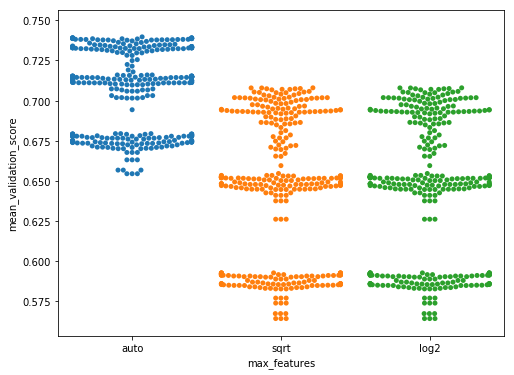

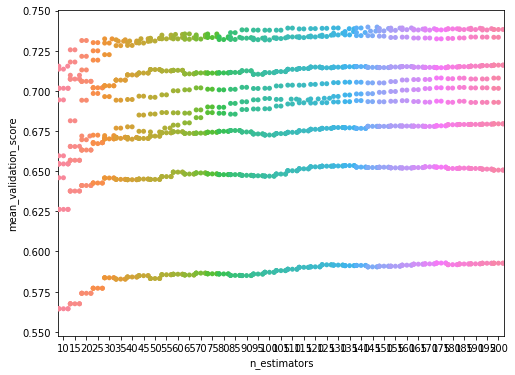

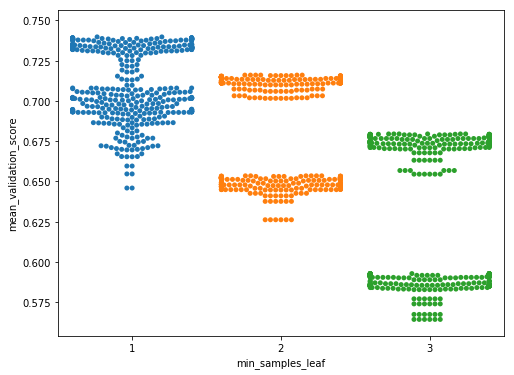

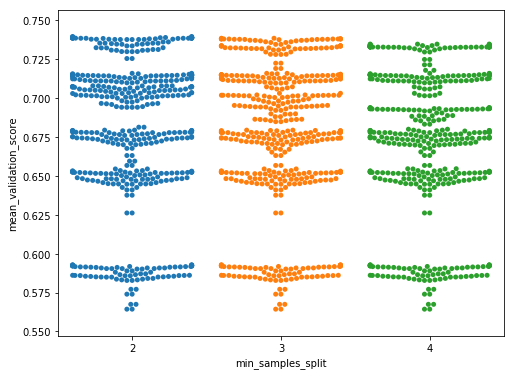

In [102]:
score = pd.DataFrame(grid_search.grid_scores_)
l = ['mean_validation_score'] + list(param_grid.keys())
for i in param_grid.keys():
    print(i, len(param_grid[i]), param_grid[i])
    score[i] = score.parameters.apply(lambda x: x[i])
for i in list(param_grid.keys()):
    plt.figure(figsize=(8, 6))
    sns.swarmplot(data = score[l], x = i, y = 'mean_validation_score')
    #plt.savefig('170705_sgd_optimisation//'+i+'.jpg', dpi = 100)
    plt.show()

In [103]:
base_model = sklearn.ensemble.ExtraTreesRegressor(n_estimators =10, random_state = 10) #10 estimators is default
base_model.fit(X_train7, y_train7)
base_accuracy = base_model.score(X_test7, y_test7)
grid_accuracy = grid_search.best_estimator_.score(X_test7, y_test7)

/home/austen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [104]:
print(base_accuracy, grid_accuracy)

0.7596559362274101 0.8012215721869613


In [105]:
grid_search.best_estimator_.score(X_train5, y_train5)

0.952373546276143

# Results With Extra Tree Regressor

We find that with the extra predictor variables help increase our accuracy within the training set and on the test set. We perform a similar grid search cross validation to create our final model. Here we see an almost 5% increase in test accuracy from the base model upon optimization, perhaps due to the fact that the extra-trees regressor controls the noisy features in a better fashion than the random forest - therefore, the extra number of estimators (140 estimators compared to 10) in grid-optimized model does not lead to overfitting, and generalizes well. In comparison, trials using more than the grid-searched number of estimators for the RandomForestRegressor (ie greater than 10) resulted in lower accuracies than the one presented.

In [107]:
predictions = grid_search.best_estimator_.predict(X_test7)
with_predictions = X_test7.copy()
with_predictions['Predicted Seq'] = predictions
with_predictions['Actual Seq'] = y_test7
#with_predictions = with_predictions[['Predicted Seq', 'Actual Seq']]
#with_predictions

In [108]:
canada_variables = pd.read_csv("canada_variables.txt").dropna()
canada_variables.columns = [x.upper() for x in list(canada_variables.columns)]
canada_variables['COMBINED_C'] = canada_variables['BC_FORST_CARB']
clean_canada_predictors = canada_variables.loc[:,['COMBINED_C','WC2_0_BIO_10M_01',
       'WC2_0_BIO_10M_04', 'WC2_0_BIO_10M_06', 'WC2_0_BIO_10M_11', 'WC2_0_BIO_10M_13','WC2_0_BIO_10M_16']]

# Prediction and Errors

In [109]:
#final models to work with - includes soil data, can only be tested on test set
X_train_w_soil, X_test_w_soil, y_train_w_soil, y_test_w_soil = sklearn.model_selection.train_test_split(
updated_data.loc[:,['COMBINED_C','COMBINED_PH', 'COMBINED_CEC','WC2_0_BIO_10M_01',
       'WC2_0_BIO_10M_04', 'WC2_0_BIO_10M_06', 'WC2_0_BIO_10M_11', 'WC2_0_BIO_10M_13','WC2_0_BIO_10M_16']], 
    updated_data.loc[:,['CORRECTSEQ']], test_size=0.2)
final_model_w_soil = sklearn.ensemble.ExtraTreesRegressor(n_estimators=140) #max_features: auto is given
final_model_w_soil.fit(X_train_w_soil, y_train_w_soil)

#doesn't include soil data, can be tested on test set and used to predict new values in Canada
X_train_no_soil, X_test_no_soil, y_train_no_soil, y_test_no_soil = sklearn.model_selection.train_test_split(
updated_data.loc[:,['COMBINED_C','WC2_0_BIO_10M_01',
       'WC2_0_BIO_10M_04', 'WC2_0_BIO_10M_06', 'WC2_0_BIO_10M_11', 'WC2_0_BIO_10M_13','WC2_0_BIO_10M_16']], 
    updated_data.loc[:,['CORRECTSEQ']], test_size=0.2)
final_model_no_soil = sklearn.ensemble.ExtraTreesRegressor(n_estimators=140)
final_model_no_soil.fit(X_train_no_soil, y_train_no_soil)

/home/austen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/austen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [110]:
# Examining prediction intervals on test set:

def pred_ints(model, X, percentile=95):
    err_down = []
    err_up = []
    for x in X.index:
        preds = []
        for pred in model.estimators_:
            #print(pred.predict(X.loc[x].reshape(1, -1))[0])
            preds.append(pred.predict(X.loc[x].reshape(1, -1))[0])
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
    return err_down, err_up

err_down, err_up = pred_ints(final_model_w_soil, X_test_w_soil)

truth = y_test_w_soil
correct = 0.
for i, val in enumerate(truth.values):
    if err_down[i] <= val <= err_up[i]:
        correct += 1
print(correct/len(truth))

/home/austen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


0.9913194444444444


Text(0,0.5,'Carbon sequestration')

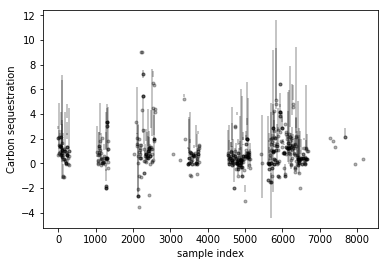

In [111]:
graph_y = y_test_no_soil.reset_index()
# plt.style.use('seaborn-whitegrid')
errors = np.array([err_down, err_up])
plt.errorbar(graph_y['index'], graph_y['CORRECTSEQ'], yerr=errors,
            fmt='.k', alpha=0.3, errorevery=3)
plt.xlabel('sample index')
plt.ylabel('Carbon sequestration')

In [83]:
#Generating Prediction interval for all data:
err_down_all, err_up_all = pred_ints(final_model_w_soil, updated_data.loc[:,['COMBINED_C','COMBINED_PH', 'COMBINED_CEC','WC2_0_BIO_10M_01',
       'WC2_0_BIO_10M_04', 'WC2_0_BIO_10M_06', 'WC2_0_BIO_10M_11', 'WC2_0_BIO_10M_13','WC2_0_BIO_10M_16']])

/home/austen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


In [84]:
#Adding in errors for the non-canada data
focus = updated_data.loc[:,['COMBINED_C','COMBINED_PH', 'COMBINED_CEC','WC2_0_BIO_10M_01',
       'WC2_0_BIO_10M_04', 'WC2_0_BIO_10M_06', 'WC2_0_BIO_10M_11', 'WC2_0_BIO_10M_13','WC2_0_BIO_10M_16']]
preds = pd.Series(final_model_w_soil.predict(focus))
preds.index = updated_data.index
updated_data['PREDSEQ'] = preds
updated_data['MSE'] = (updated_data['PREDSEQ'] - updated_data['CORRECTSEQ']) ** 2
min_int, max_int = pd.Series(err_down_all), pd.Series(err_up_all)
min_int.index = updated_data.index
max_int.index = updated_data.index
updated_data['MIN_INT'] = min_int
updated_data['MAX_INT'] = max_int
updated_data['PREDINT_WIDTH'] = updated_data['MAX_INT'] - updated_data['MIN_INT']
updated_data.head()

,SAMPLE_POINTS,X,Y,CORRECTSEQ,COMBINED_C,COMBINED_PH,COMBINED_CEC,COMBINED_BD,WC2_0_BIO_10M_01,WC2_0_BIO_10M_04,WC2_0_BIO_10M_06,WC2_0_BIO_10M_11,WC2_0_BIO_10M_13,WC2_0_BIO_10M_16,PREDSEQ,MSE,MIN_INT,MAX_INT,PREDINT_WIDTH
0,0,911976.617356,5.357005e+06,2.029400,167.813904,58.965643,45.590278,255.0,7.040217,799.130967,-10.968351,-2.694131,85.337638,240.268649,2.029400,0.000000e+00,2.029400,2.029400,0.000000
1,1,901817.075322,5.363050e+06,1.789343,158.315415,54.045296,43.888858,255.0,6.328214,782.814812,-10.779201,-3.125324,83.965263,236.661452,1.789343,1.779867e-29,1.789343,1.789343,0.000000
2,2,918805.202873,5.369724e+06,2.029400,166.737509,62.911784,30.678458,255.0,7.120946,808.225666,-11.248461,-2.795291,90.993851,258.906722,1.632073,1.578688e-01,0.705719,2.298852,1.593133
3,3,925121.402213,5.364111e+06,0.710281,99.616169,62.480930,33.984541,255.0,7.106221,802.095926,-11.008685,-2.680838,94.153166,268.574089,0.710281,4.930381e-32,0.710281,0.710281,0.000000
4,4,906940.305528,5.361813e+06,2.029400,167.813904,58.638708,40.451616,255.0,6.546063,787.948963,-10.826986,-3.001255,85.298647,240.266599,2.029400,0.000000e+00,2.029400,2.029400,0.000000


In [85]:
updated_data.to_csv('outputs.csv')

## outputs.csv used to display results in arcgis - see appendix to summary document

In [88]:
# Predicting Canada outputs
canada_predictions = pd.Series(final_model_no_soil.predict(clean_canada_predictors))
canada_predictions.index = clean_canada_predictors.index


In [89]:
err_down_can, err_up_can = pred_ints(final_model_no_soil, clean_canada_predictors)

min_int, max_int = pd.Series(err_down_can), pd.Series(err_up_can)
min_int.index = clean_canada_predictors.index
max_int.index = clean_canada_predictors.index
clean_canada_predictors['PREDSEQ'] = canada_predictions
clean_canada_predictors['MIN_INT'] = min_int
clean_canada_predictors['MAX_INT'] = max_int
clean_canada_predictors['PREDINT_WIDTH'] = clean_canada_predictors['MAX_INT'] - clean_canada_predictors['MIN_INT']
clean_canada_predictors.to_csv('canada_variables.csv')

/home/austen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


## canada_variables.csv also displayed in ArcGIS

Text(0,0.5,'Carbon Sequestration')

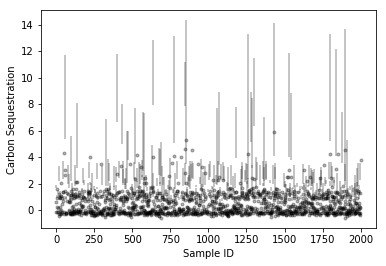

In [91]:
graph_y = clean_canada_predictors.reset_index()
# plt.style.use('seaborn-whitegrid')
errors = np.array([err_down_can, err_up_can])
plt.errorbar(graph_y['index'], graph_y['PREDSEQ'], yerr=errors,
            fmt='.k', alpha=0.3, errorevery=3)
plt.xlabel('Sample ID')
plt.ylabel('Carbon Sequestration')

## some future directions (more details in final summary paper)

future datasets and how the model is going to get better:

1) worldwide data - more variability encompassed than the small differences we're trying to predict in just one forest type

2) point data rather than regional aggregate data - topography data (slope+aspect+elevation) will become useful then, as well as things like solar radiation

3) time since disturbance and other metrics of land use change - have to build this by looking at change in the hansen vegetation cover data

4) add solar radiation + windspeeds from worldclim